In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [23]:
data = pd.read_csv('creditcard.csv')

In [24]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [26]:
data.duplicated().sum()

1081

In [27]:
# Remove duplicate rows from the original DataFrame
data.drop_duplicates(inplace=True)

Text(0.5, 0, 'Class')

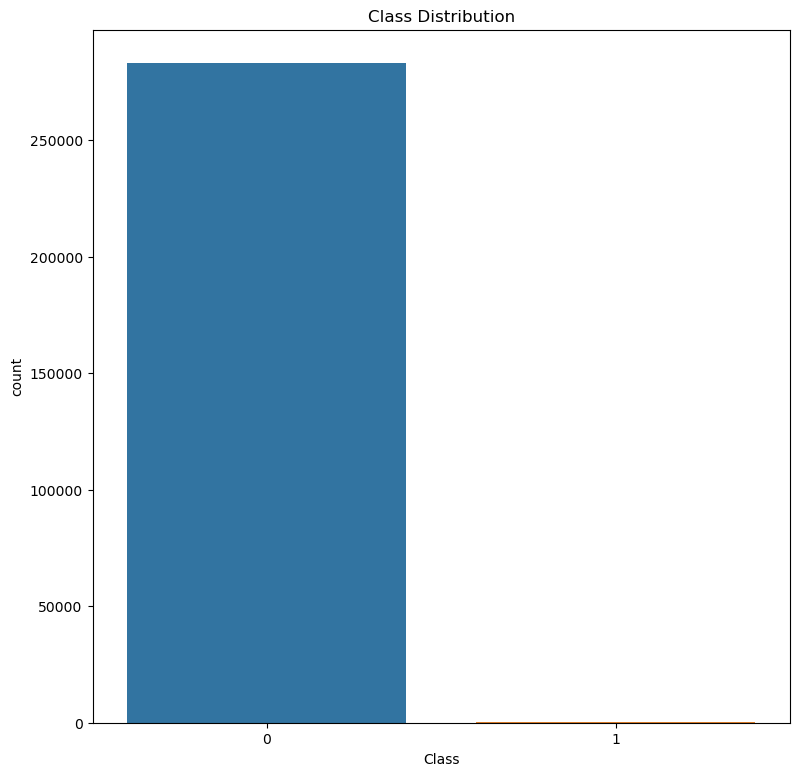

In [28]:
plt.figure(figsize=(9,9))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')

In [31]:
#Print the number of rows and columns in the dataframe
data.shape

(283726, 31)

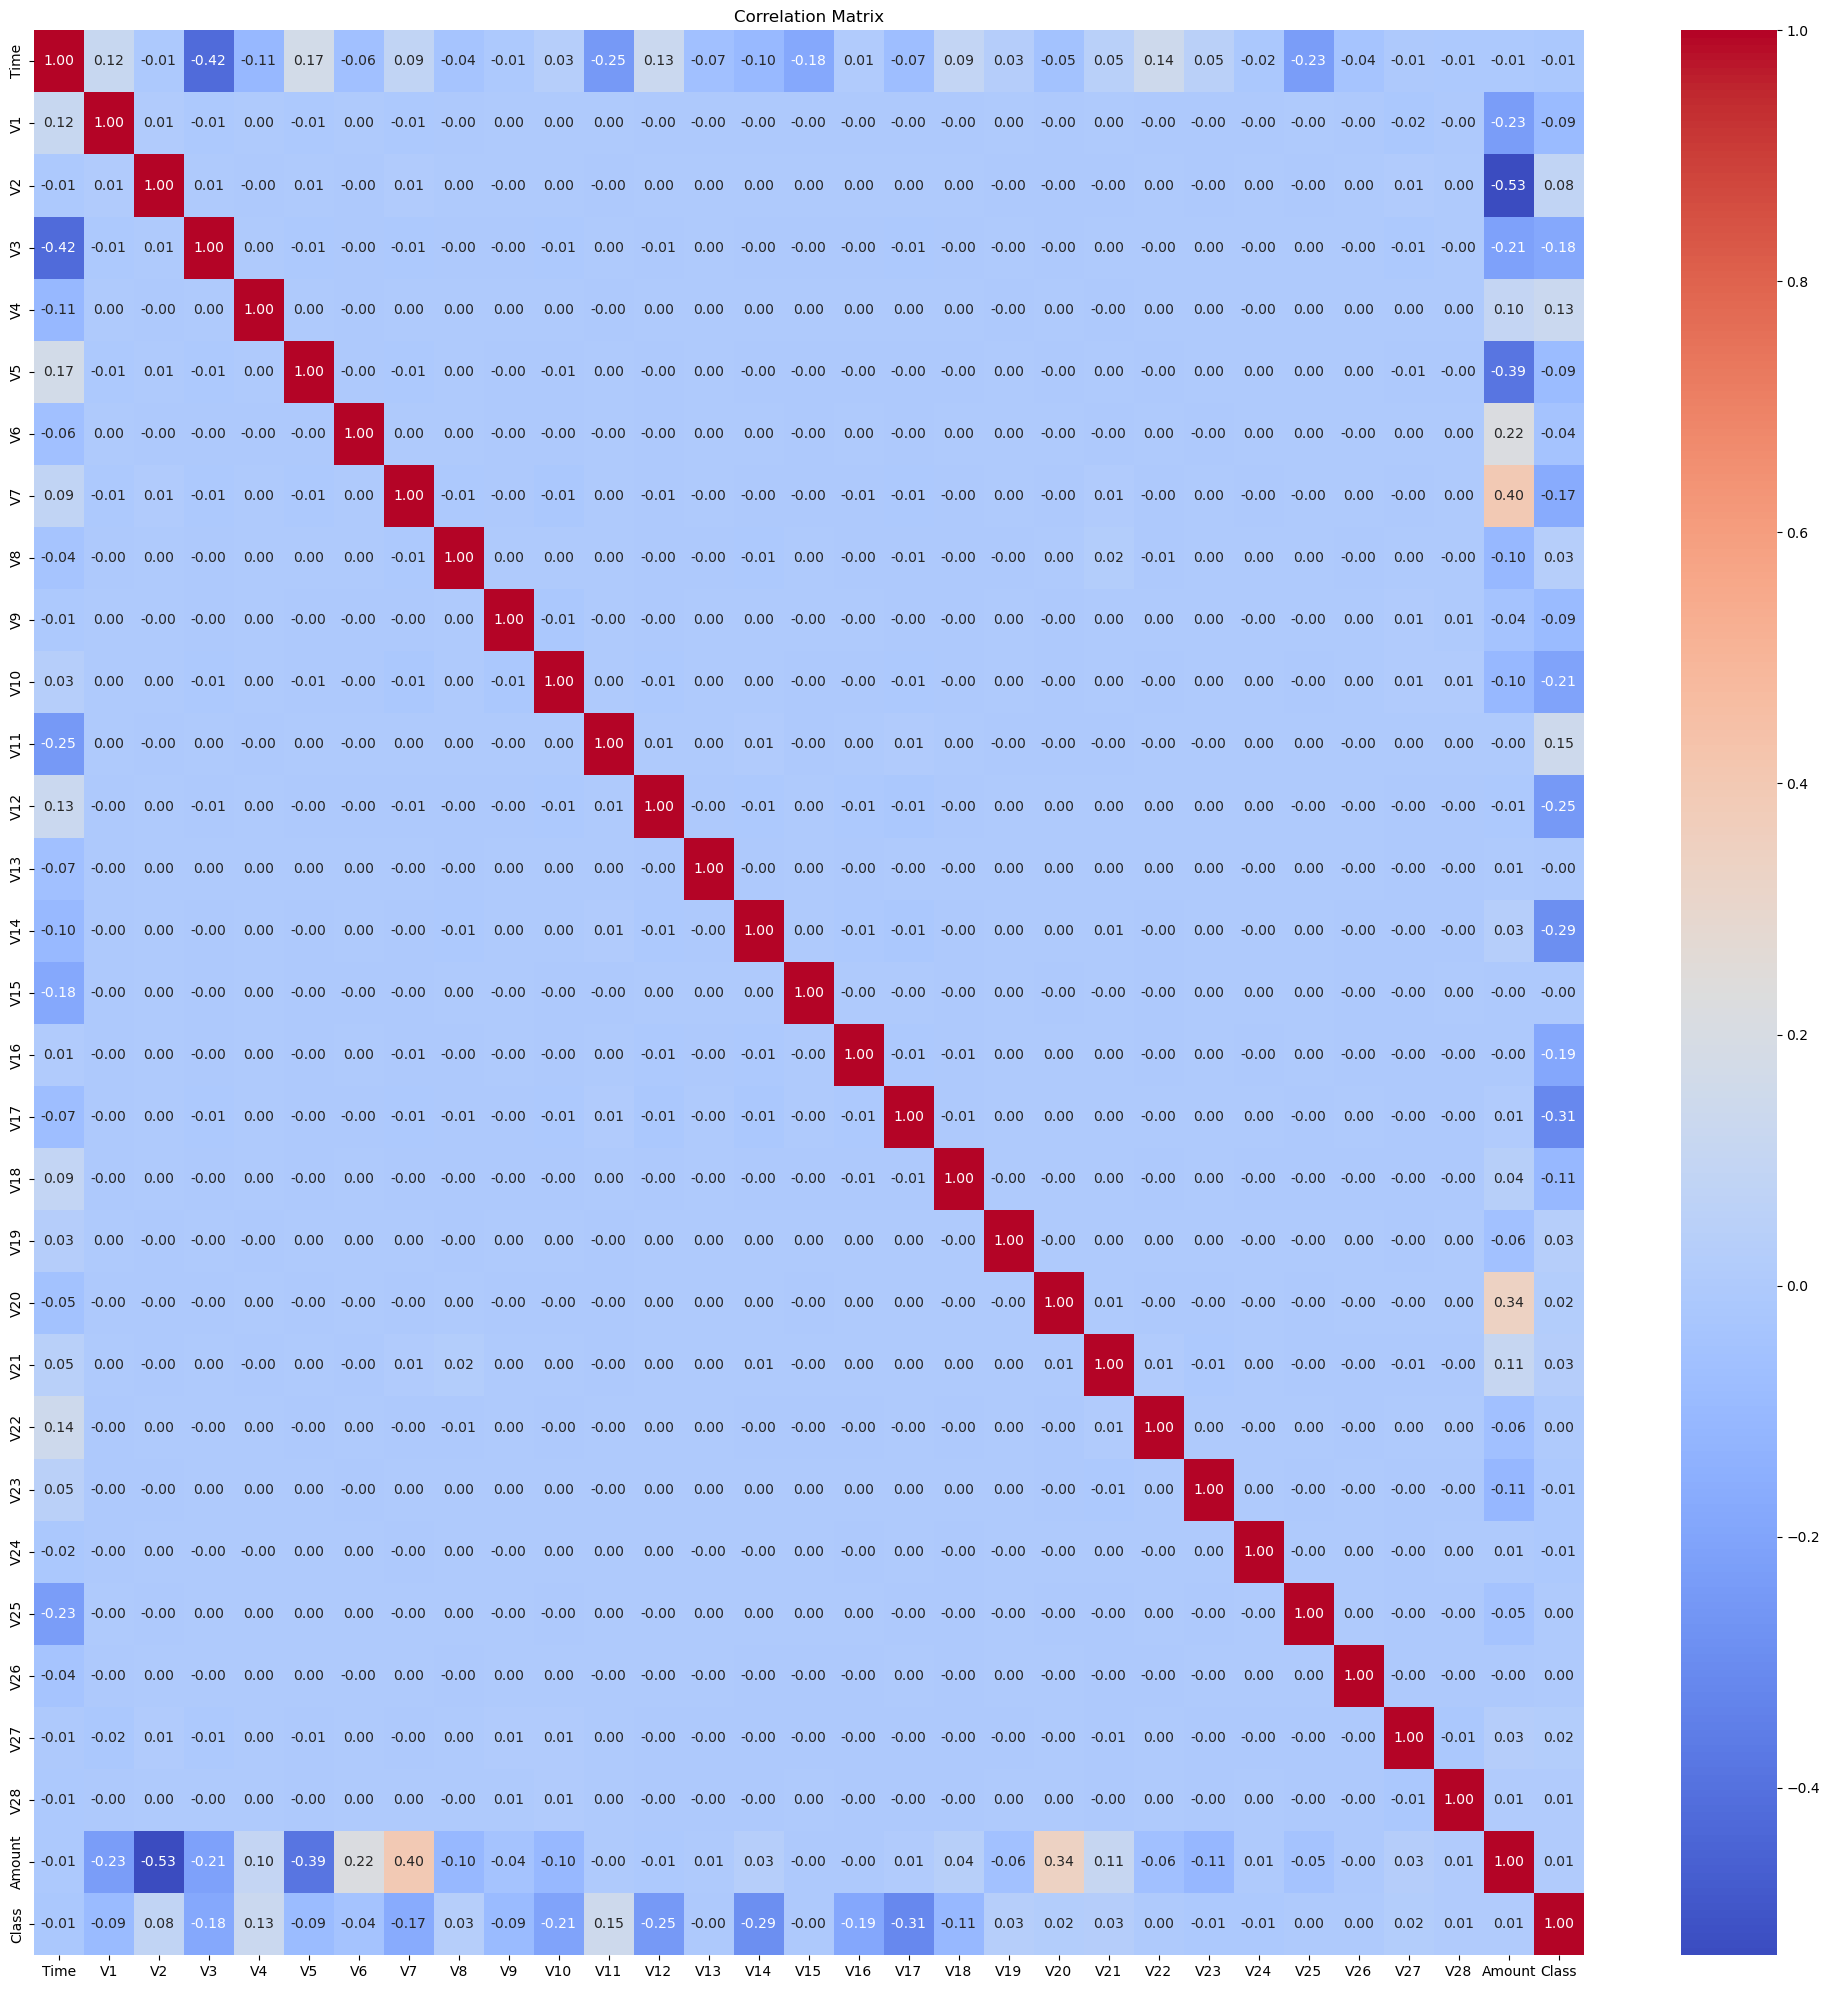

In [34]:
plt.figure(figsize=(25,25))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

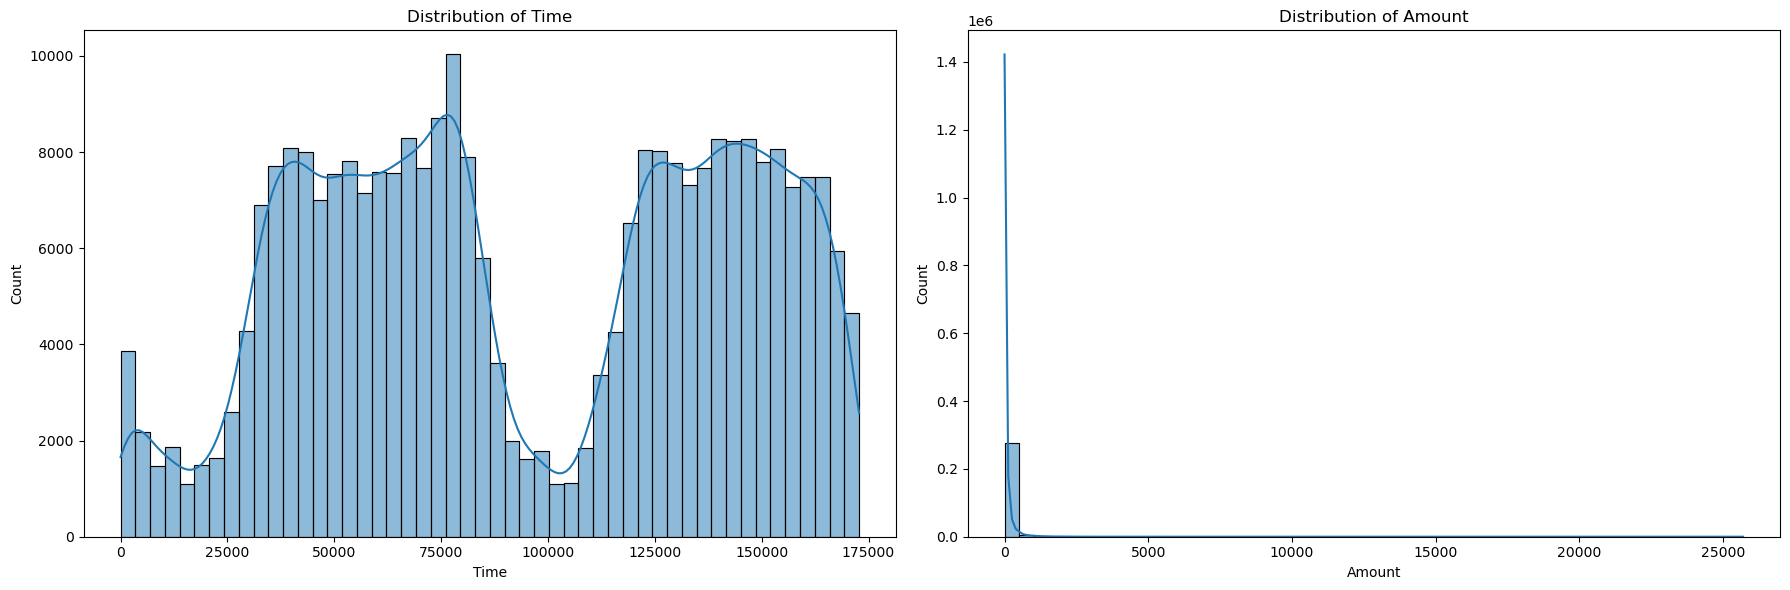

In [40]:
# Visualize the data distribution for 'Time' and 'Amount'
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Distribution of Time')

plt.subplot(1, 2, 2)
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount')

plt.tight_layout()
plt.show()

In [42]:
#Preprocessing

scaler = StandardScaler()
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [46]:
# Separate features from target variable

X = data.drop('Class', axis=1)
y = data['Class']

In [48]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Data Modelling

lr = LogisticRegression()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
sm = SVC()

In [ ]:
# Fit the model to the training data
lr.fit(X_train, y_train)

rfc.fit(X_train, y_train)

dt.fit(X_train, y_train)

sm.fit(X_train, y_train)

In [65]:
# Predict the results

lr_predicted = lr.predict(X_test)

rfc_predicted = rfc.predict(X_test)

dt_predicted = dt.predict(X_test)

sm_predicted = sm.predict(X_test)

In [59]:
accuracy_lr = metrics.accuracy_score(y_test, lr_predicted)
print(accuracy_lr)

accuracy_rfc = metrics.accuracy_score(y_test, rfc_predicted)
print(accuracy_rfc)

accuracy_dt = metrics.accuracy_score(y_test, dt_predicted)
print(accuracy_dt)

accuracy_sm = metrics.accuracy_score(y_test, sm_predicted)
print(accuracy_sm)

0.9991658638595832
0.9995183157499001
0.9991188702742075
0.9993890833901172


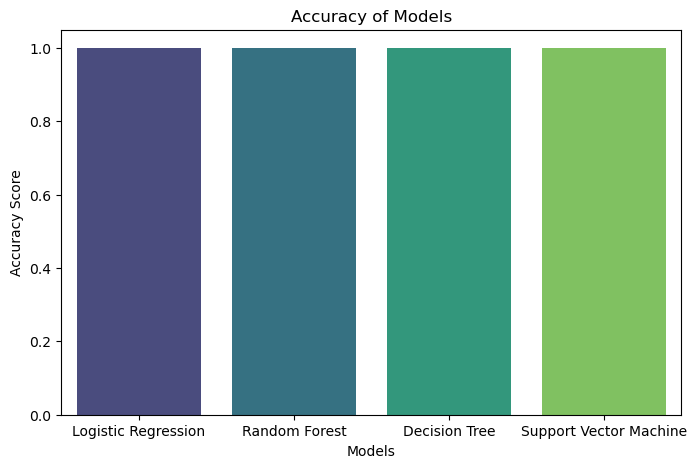

In [64]:
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Machine']
accuracy_scores = [accuracy_lr, accuracy_rfc, accuracy_dt, accuracy_sm ]

plt.figure(figsize=(8,5))


sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.title('Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()

In [67]:
Precision_lr = metrics.precision_score(y_test, lr_predicted)
print(Precision_lr)

Precision_rfc = metrics.precision_score(y_test, rfc_predicted)
print(Precision_rfc)

Precision_dt = metrics.precision_score(y_test, dt_predicted)
print(Precision_dt)

Precision_sm = metrics.precision_score(y_test, sm_predicted)
print(Precision_sm)

0.8705882352941177
0.9514563106796117
0.7092198581560284
0.9361702127659575


In [68]:
Recall_lr = metrics.recall_score(y_test, lr_predicted)
print(Recall_lr)

Recall_rfc = metrics.recall_score(y_test, rfc_predicted)
print(Recall_rfc)

Recall_dt = metrics.recall_score(y_test, dt_predicted)
print(Recall_dt)

Recall_sm = metrics.recall_score(y_test, sm_predicted)
print(Recall_sm)

0.5522388059701493
0.7313432835820896
0.746268656716418
0.6567164179104478


In [69]:
f1_lr = metrics.f1_score(y_test, lr_predicted)
print(f1_lr)

f1_rfc = metrics.f1_score(y_test, rfc_predicted)
print(f1_rfc)

f1_dt = metrics.f1_score(y_test, dt_predicted)
print(f1_dt)

f1_sm = metrics.f1_score(y_test, sm_predicted)
print(f1_sm)

0.6757990867579908
0.8270042194092827
0.7272727272727273
0.7719298245614035


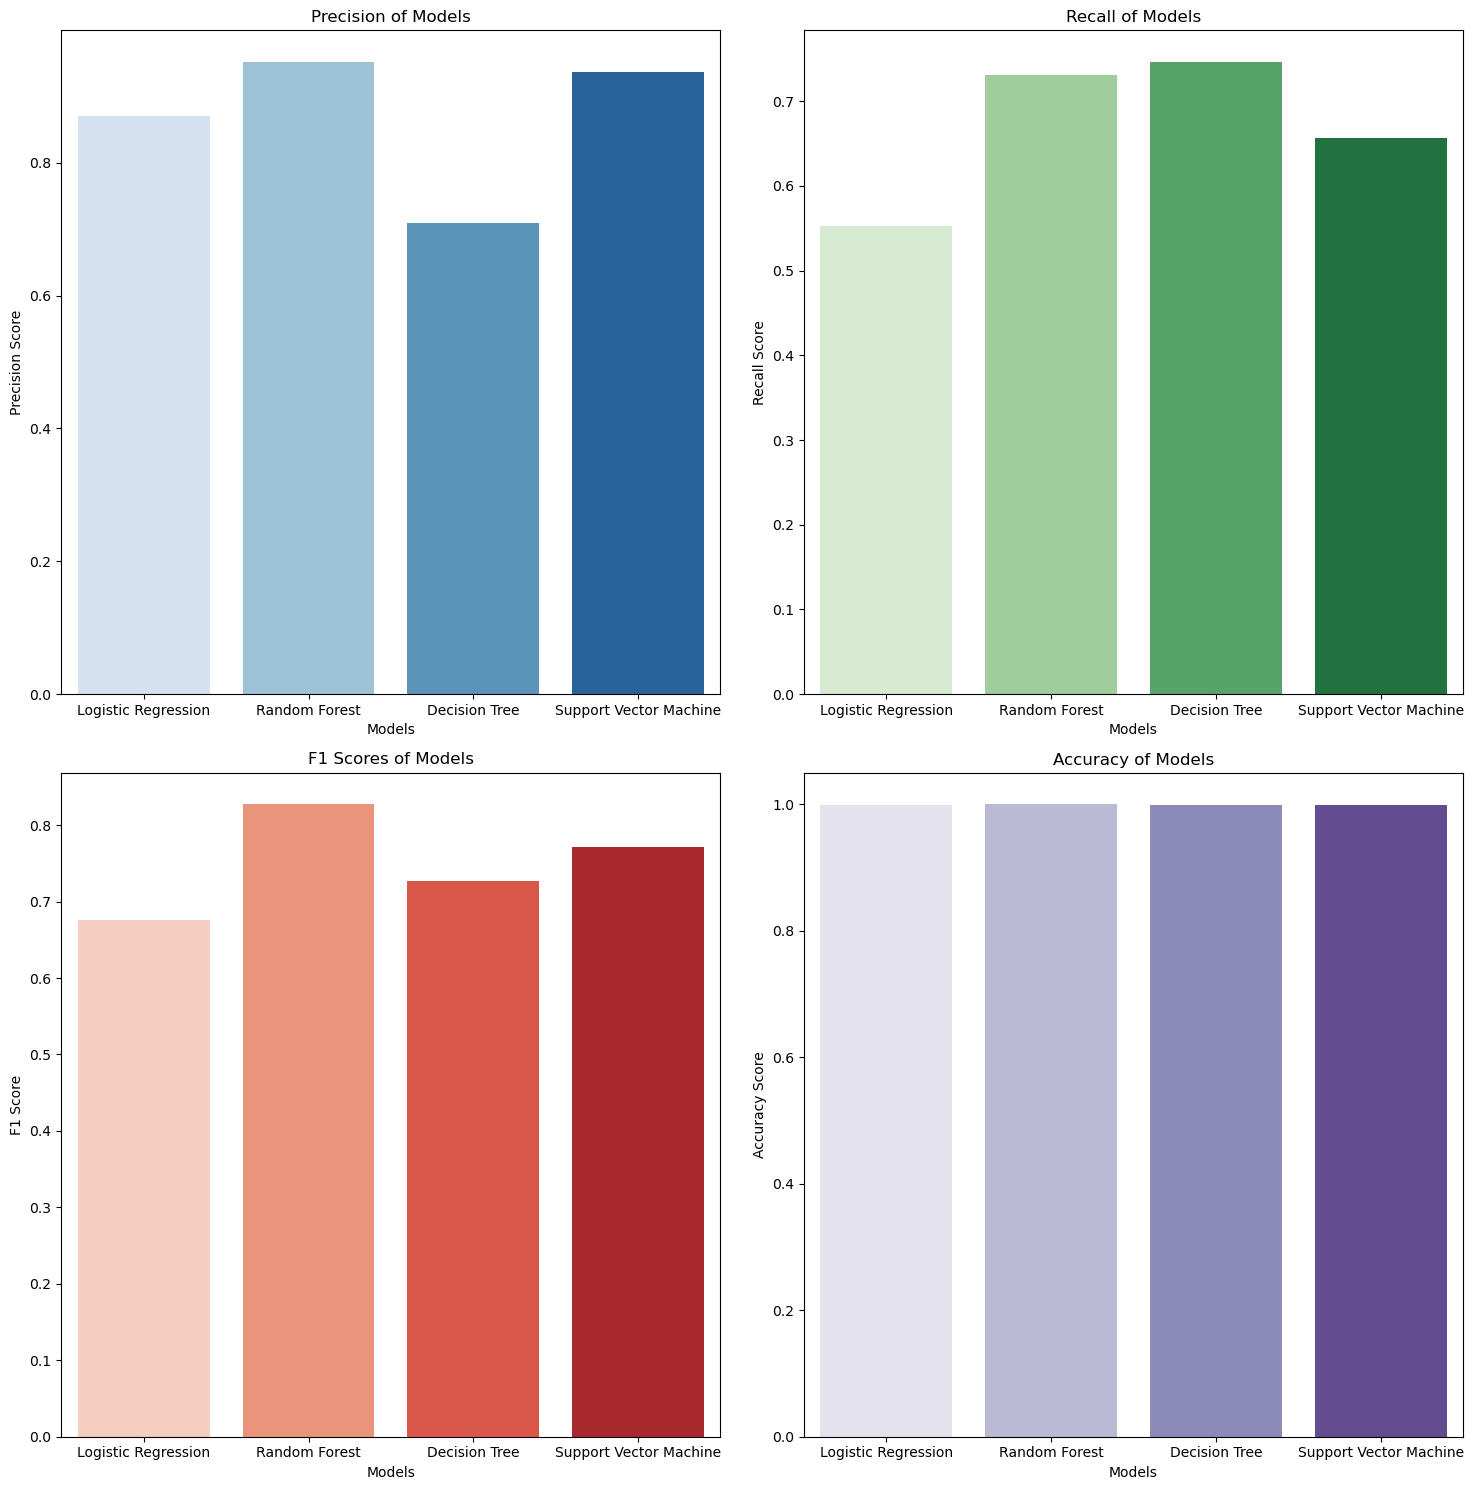

In [79]:
precision_scores = [Precision_lr, Precision_rfc, Precision_dt, Precision_sm ]
recall_scores = [Recall_lr, Recall_rfc, Recall_dt, Recall_sm ]
f1_scores = [f1_lr, f1_rfc, f1_dt, f1_sm ]

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.barplot(x=model_names, y=precision_scores, palette='Blues')
plt.title('Precision of Models')
plt.xlabel('Models')
plt.ylabel('Precision Score')

plt.subplot(2,2,2)
sns.barplot(x=model_names, y=recall_scores, palette='Greens')
plt.title('Recall of Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')

plt.subplot(2,2,3)
sns.barplot(x=model_names, y=f1_scores, palette='Reds')
plt.title('F1 Scores of Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')

plt.subplot(2,2,4)
sns.barplot(x=model_names, y=accuracy_scores, palette='Purples')
plt.title('Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

plt.tight_layout()
plt.show()

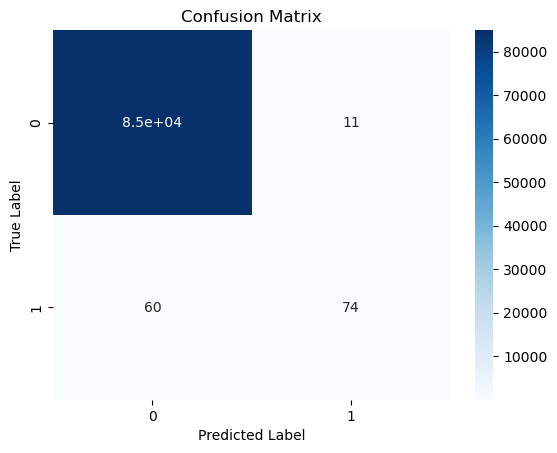

In [90]:
from sklearn.metrics import confusion_matrix

conf_matrix_lr = confusion_matrix(y_test, lr_predicted)
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

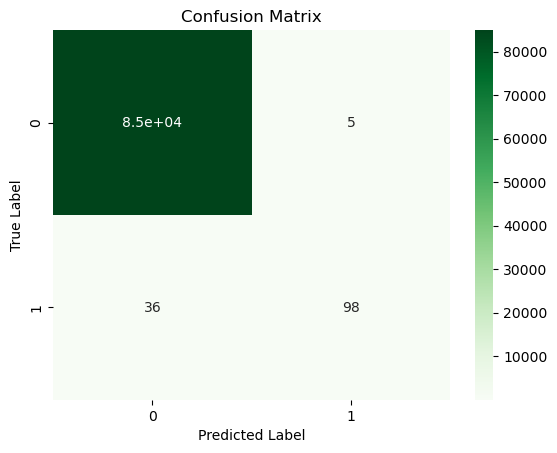

In [89]:
conf_matrix_rfc = confusion_matrix(y_test, rfc_predicted)
sns.heatmap(conf_matrix_rfc, annot=True, cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

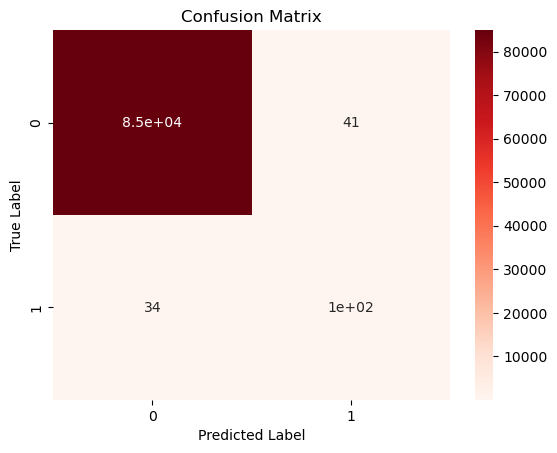

In [88]:
conf_matrix_dt = confusion_matrix(y_test, dt_predicted)
sns.heatmap(conf_matrix_dt, annot=True, cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

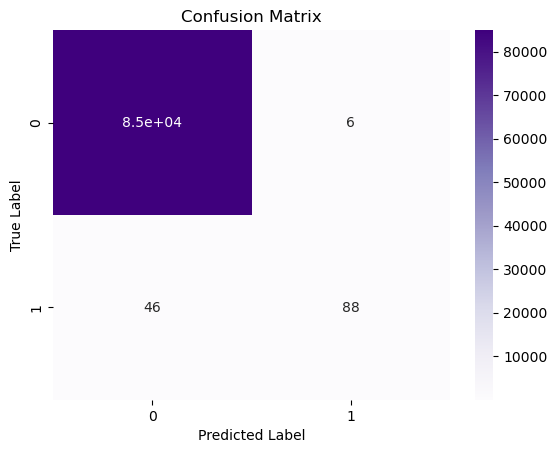

In [87]:
conf_matrix_sm = confusion_matrix(y_test, sm_predicted)
sns.heatmap(conf_matrix_sm, annot=True, cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()